# Introdução Data Exploratory

Nesse estudo vamos realizar uma análise exploratória a respeito dos dados abertos de Gastos Públicos de Senadores.

A base de dados foi disponibilizada atraves do Portal da Transparencia do Governo Federal, sendo emitida pelo Ministério do Planejamento, Desenvolvimento e Gestão.

A partir da limpeza que foi realizada no outro notebook, agora temos input para entender onde estão os principais outliers de gastos financeiros de senadores.

# Glossário

**CEAPS**: Cota para Exercício de Atividade Parlamentar dos Senadores

# Dataset

Dataset disponível [clicando aqui](https://drive.google.com/drive/folders/1vd-lBx8yaMkxY2urLFRazS8Z_SIpkRL1).

# Expectativas

Entender melhor os gastos públicos e quais são os principais ofensores de gastos.

In [1]:
import pandas as pd #Data Cleansing
import numpy as np #
import matplotlib.pyplot as plt
import seaborn as sns #Data Exploratory

In [2]:
data = pd.read_csv("ceaps_dataset_data_cleansing.csv", sep=";", encoding='latin1')
data['DATA'] = pd.to_datetime(data['DATA'])

In [3]:
data.dtypes

DATA                 datetime64[ns]
ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [4]:
data.columns

Index(['DATA', 'ANO', 'MES', 'DIA', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF',
       'FORNECEDOR', 'DOCUMENTO', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'],
      dtype='object')

In [5]:
#Selecionando com duas multiplas condições
data.loc[(data['VALOR_REEMBOLSADO'] == 0.01) & (data['FORNECEDOR'] == 'GOL')]

,DATA,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO
6847,2016-03-22,2016,3,22,FERNANDO BEZERRA COELHO,Despesas com transporte,07.575.651/0001-59,GOL,NFPJ4Z,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6848,2016-03-30,2016,3,30,FERNANDO BEZERRA COELHO,Despesas com transporte,07.575.651/0001-59,GOL,OEI85P,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01


In [6]:
data.loc[(data['TIPO_DESPESA'] == 'Despesas com marketing')].describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO
count,1083.000000,1083.000000,1083.000000,1083.000000
mean,2016.011080,6.146814,15.841182,3310.679400
std,0.104727,3.536665,8.707863,9795.249986
min,2016.000000,1.000000,1.000000,24.650000
25%,2016.000000,3.000000,8.000000,853.500000
50%,2016.000000,6.000000,15.000000,2000.000000
75%,2016.000000,9.000000,24.000000,3000.000000
max,2017.000000,12.000000,31.000000,256980.000000


In [7]:
gastos_de_senadores = data.groupby('SENADOR')
gastos_de_senadores = gastos_de_senadores['VALOR_REEMBOLSADO'].sum()

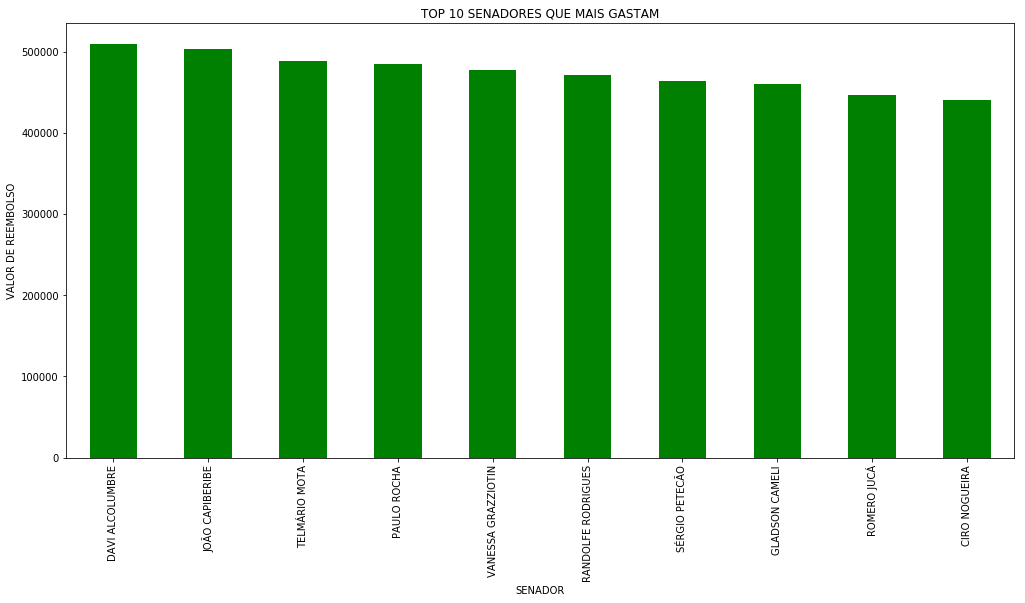

In [8]:
gastos_de_senadores.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(17,8), color=["green"])
plt.title("TOP 10 SENADORES QUE MAIS GASTAM")
plt.ylabel("VALOR DE REEMBOLSO")
plt.show()

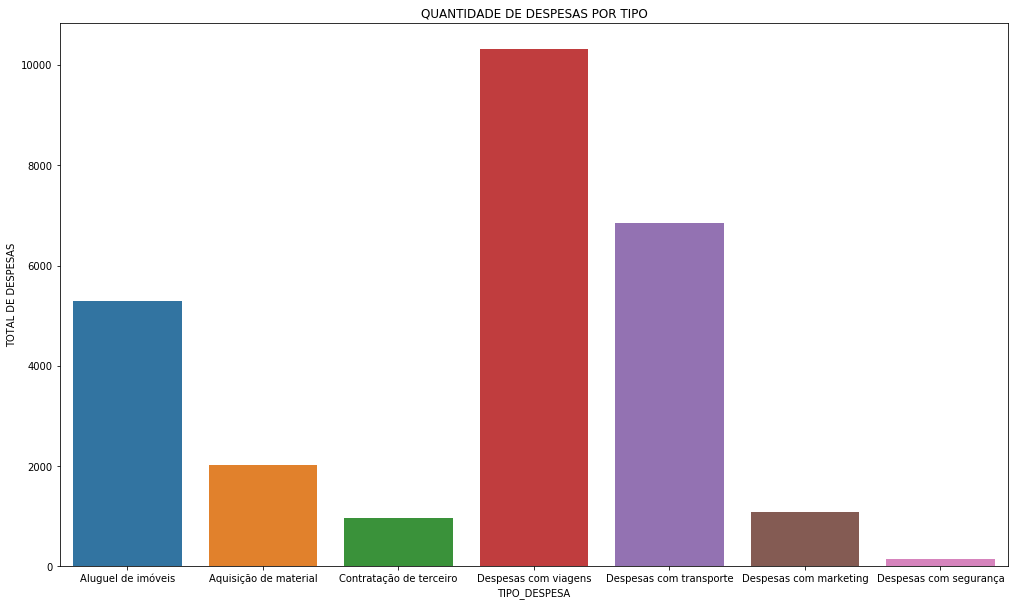

In [9]:
plt.figure(figsize=(17,10))
sns.countplot(data=data, x='TIPO_DESPESA')
plt.title('QUANTIDADE DE DESPESAS POR TIPO')
#plt.xlabel('TIPO DE DESPESA')
plt.ylabel('TOTAL DE DESPESAS')
plt.show()

# Conclusão

Conforme podemos observar, o maior custo de despesas atualmente é com viagens, transportes e alugel de imóveis.

O estudo foi realizado sem nenhum viés.

# Heatmap

In [10]:
data['ANO_MES'] = data['DATA'].dt.strftime('%Y-%m')

In [11]:
data = data.filter(['DATA', 'ANO_MES', 'ANO', 'MES', 'DIA', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DOCUMENTO', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'])

In [12]:
data_pivot = data.pivot_table(index='ANO_MES', columns='TIPO_DESPESA', values='VALOR_REEMBOLSADO', aggfunc=np.sum, fill_value=0)

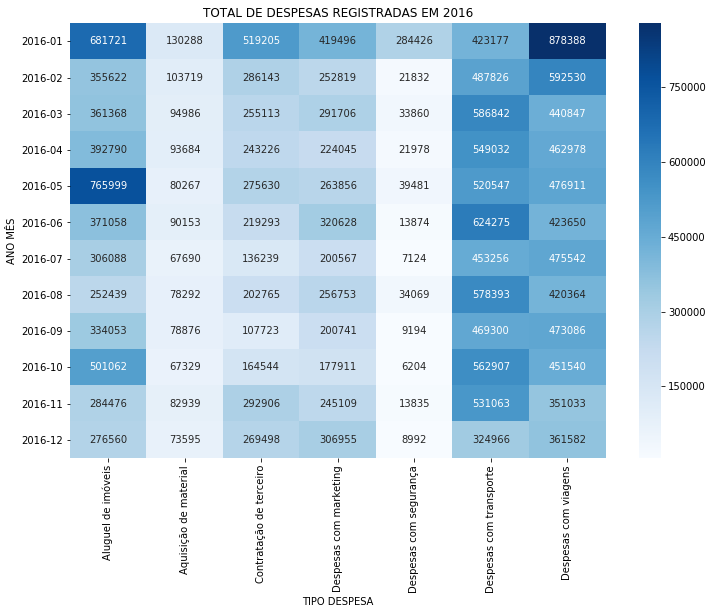

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data_pivot.loc['2016-01':'2016-12'], annot=True, fmt='.0f', cmap="Blues")
plt.title('TOTAL DE DESPESAS REGISTRADAS EM 2016')
plt.xlabel('TIPO DESPESA')
plt.ylabel('ANO MÊS')
plt.show()